In [1]:
!pip install easyocr
!apt-get -y install fonts-nanum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

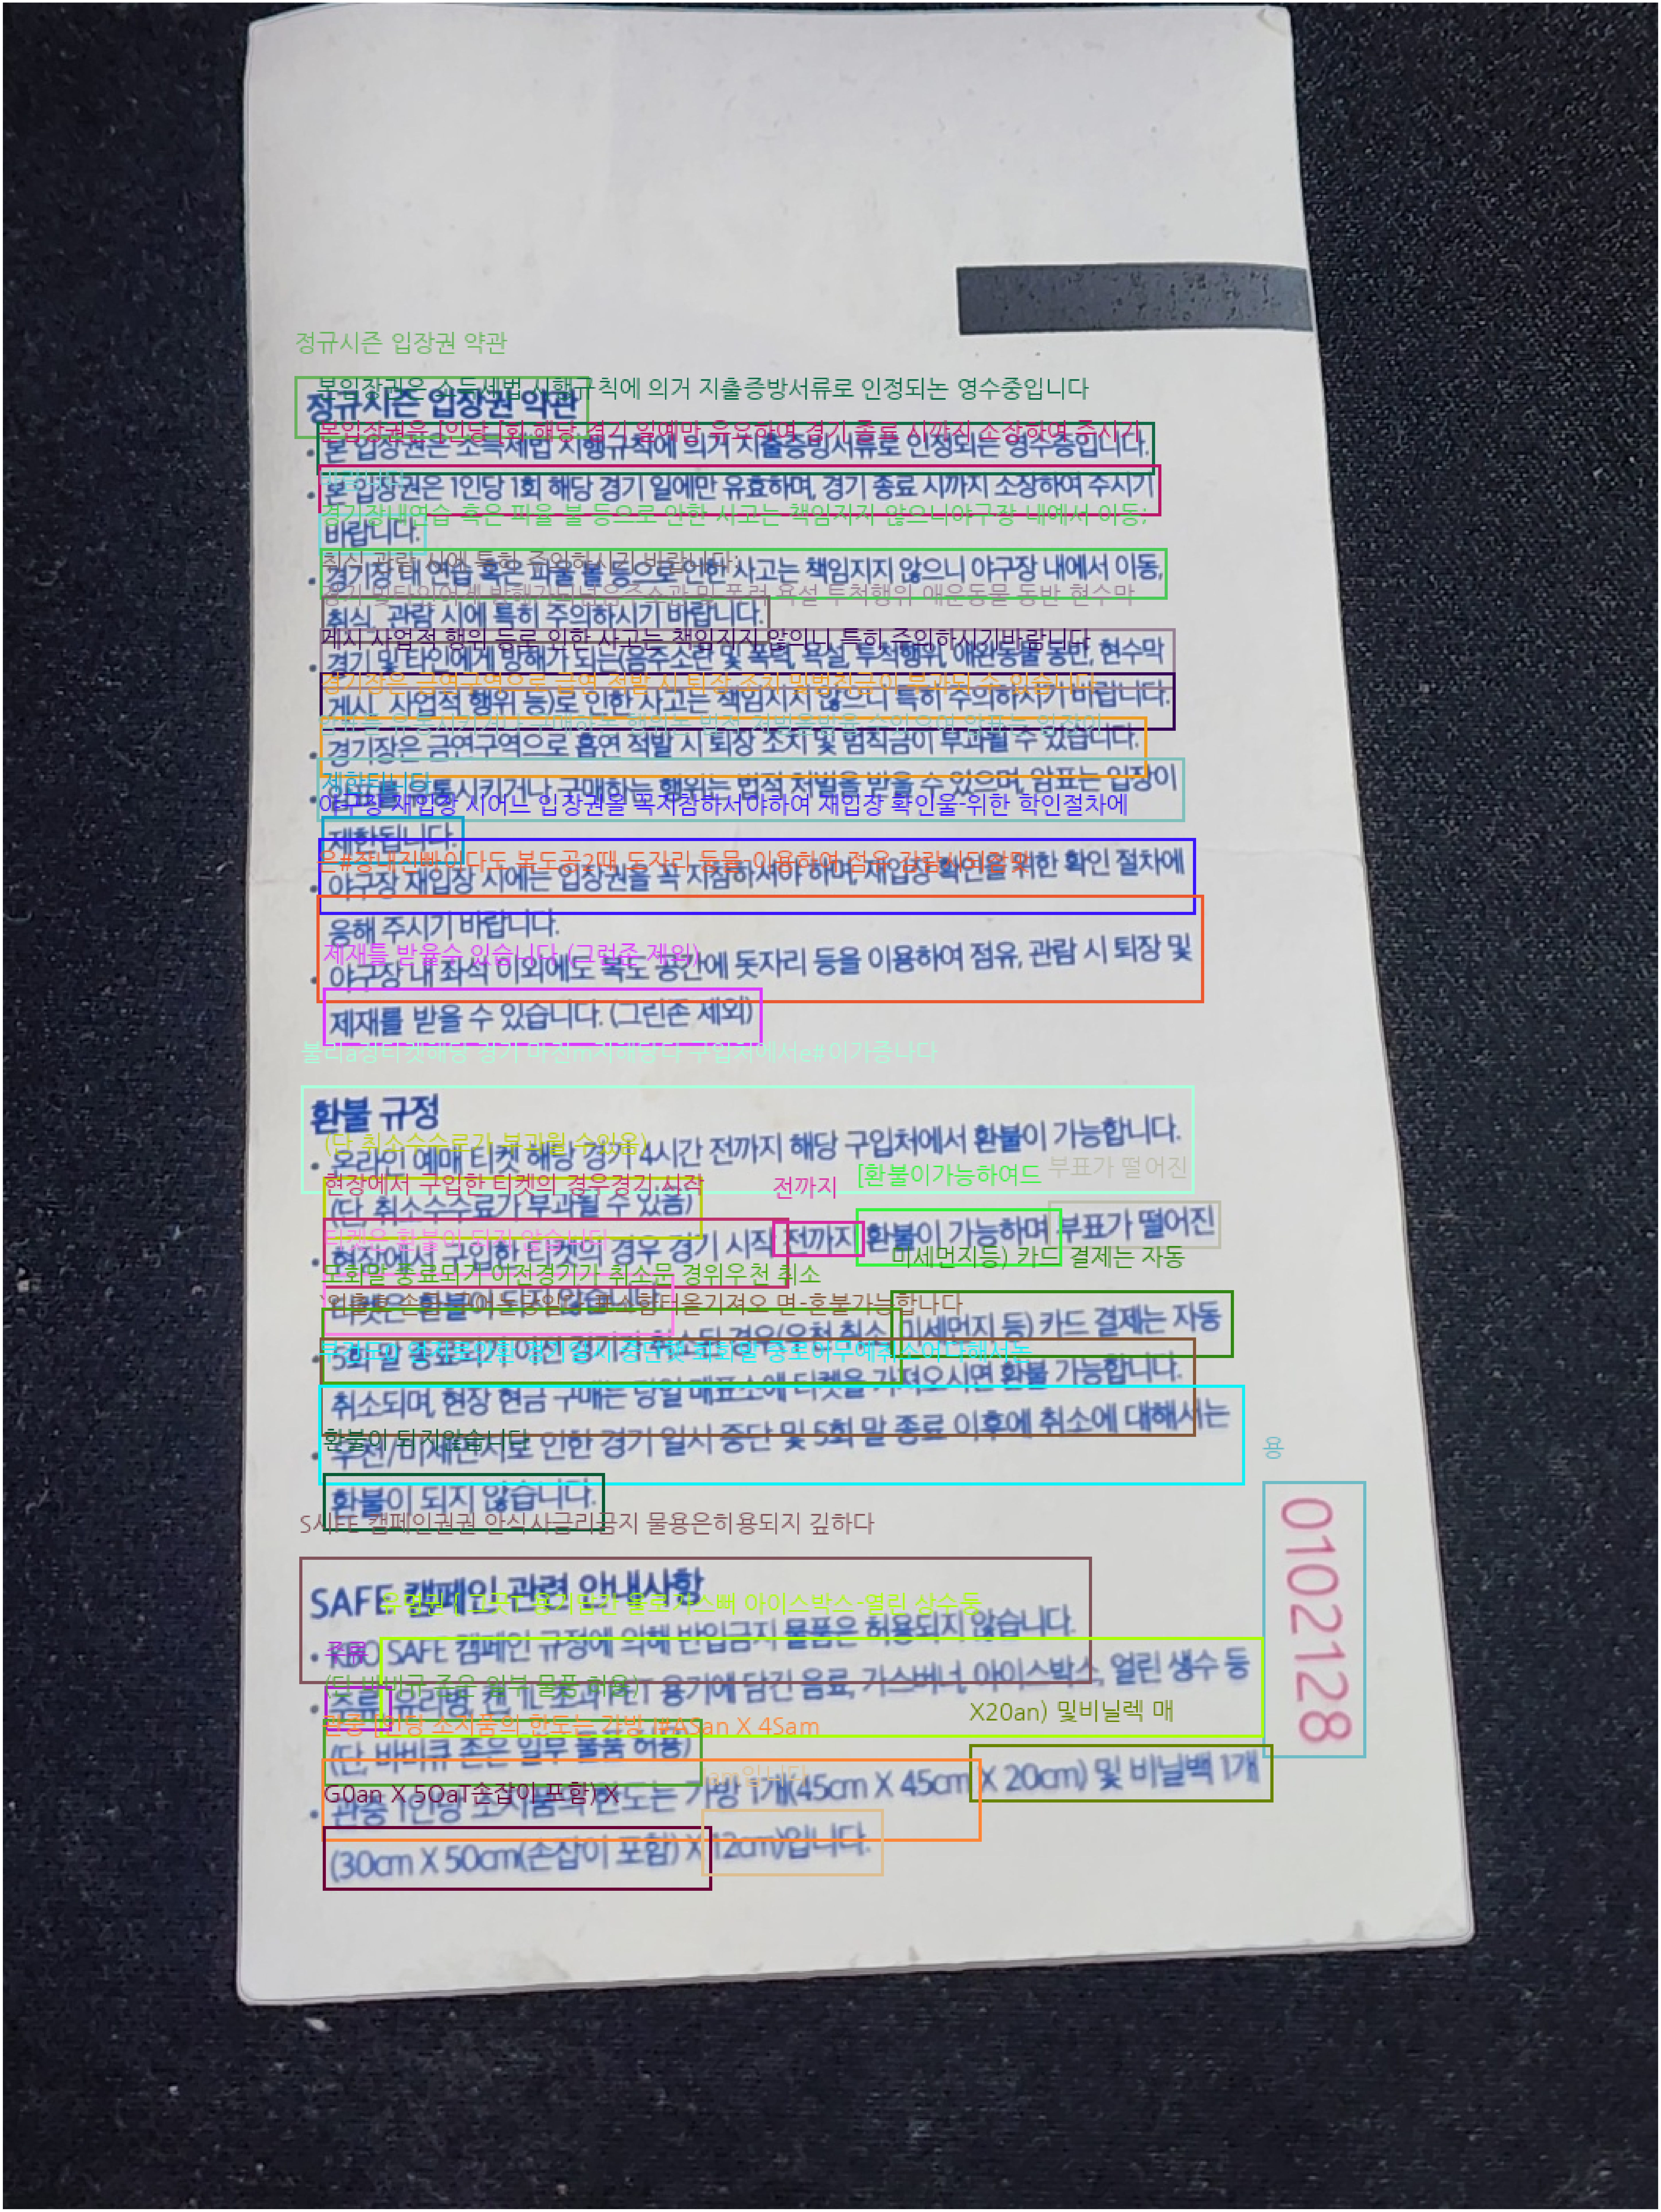

In [7]:
import easyocr
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

# EasyOCR Reader
reader = easyocr.Reader(['ko', 'en'], gpu=False)
results = reader.readtext('test.jpg')

# 이미지 로딩
image = cv2.imread('test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(image)

# 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = ImageFont.truetype(font_path, 15)

draw = ImageDraw.Draw(image_pil)
np.random.seed(42)

for (bbox, text, _) in results:
    x_min, y_min = map(int, bbox[0])
    x_max, y_max = map(int, bbox[2])
    color = tuple(np.random.randint(0, 256, 3).tolist())
    draw.rectangle([bbox[0], bbox[2]], outline=color, width=2)
    draw.text((x_min, y_min - 30), text, font=font, fill=color)

# 이미지 표시
plt.figure(figsize=(100, 100))
plt.imshow(np.asarray(image_pil))  # 💡 이 부분은 안전합니다
plt.axis('off')
plt.show()

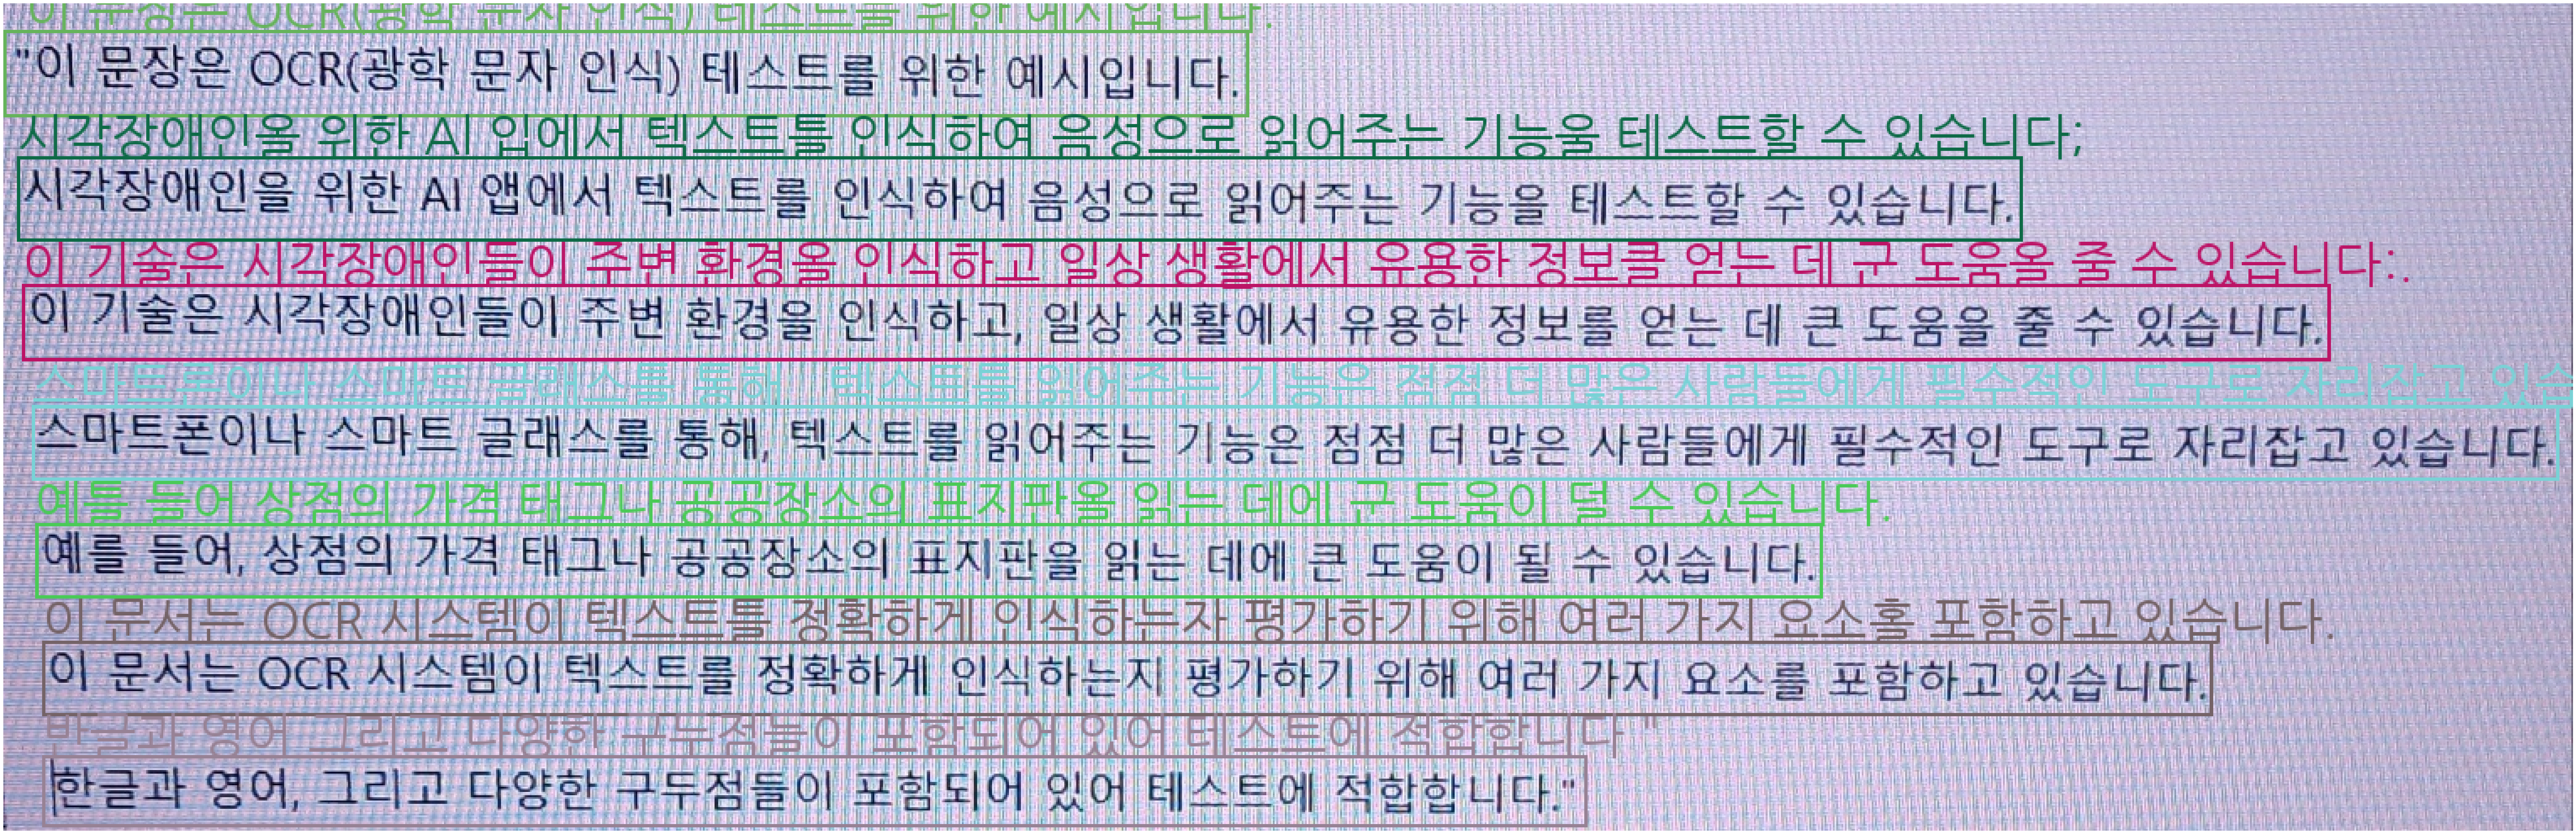

In [5]:
# EasyOCR Reader
reader = easyocr.Reader(['ko', 'en'], gpu=False)
results = reader.readtext('test2.jpg')

# 이미지 로딩
image = cv2.imread('test2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(image)

# 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = ImageFont.truetype(font_path, 30)

draw = ImageDraw.Draw(image_pil)
np.random.seed(42)

for (bbox, text, _) in results:
    x_min, y_min = map(int, bbox[0])
    x_max, y_max = map(int, bbox[2])
    color = tuple(np.random.randint(0, 256, 3).tolist())
    draw.rectangle([bbox[0], bbox[2]], outline=color, width=2)
    draw.text((x_min, y_min - 30), text, font=font, fill=color)

# 이미지 표시
plt.figure(figsize=(100, 100))
plt.imshow(np.asarray(image_pil))  # 💡 이 부분은 안전합니다
plt.axis('off')
plt.show()